In [11]:
# evaluate an ARIMA model using a walk-forward validation
import pandas as pd
import math
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np


In [12]:
import statsmodels

In [13]:
print(statsmodels.__version__)


0.14.0


In [14]:
pm10 = pd.read_csv('data/PM10.csv')
print(pm10.head(2))

              datetime  PM10
0  2020-01-01 00:00:00  42.0
1  2020-01-02 00:00:00  39.0


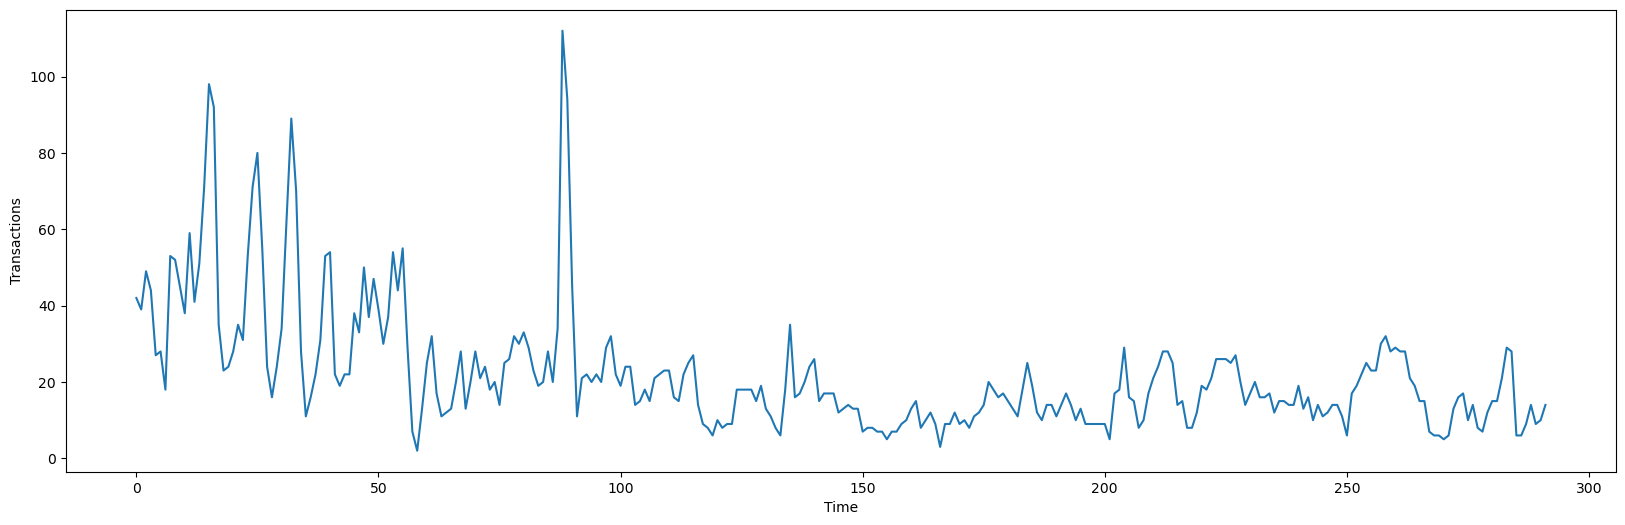

In [15]:
plt.figure(figsize = (20, 6))
plt.xlabel("Time")
plt.ylabel("Transactions")

plt.plot(pm10["PM10"])
plt.show()

### Prepare the data for ARIMA

In [16]:
X = pm10["PM10"]

In [17]:
# split into train and test sets
prediction_period = 45
train, test = X[1:len(X)- prediction_period], X[len(X)-prediction_period:]
history = [x for x in train]
predictions = list()

### Rolling Forecast ARIMA Model using walk-forward validation. 

- the rolling forecast is required given the dependence on observations in prior time steps 


- a way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received. 


- manually keep track of all observations in a list called history that is seeded with the training data


- append to history new observations after each iteration

In [18]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(7,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


KeyError: 0

### Forecasting Error Computation 

In [19]:
err = test - obs

NameError: name 'obs' is not defined

In [20]:
MAE = np.mean(np.abs(history - obs))
#RMSE = math.sqrt(mean_squared_error(history, obs))
MAPE = np.mean(np.abs(err / history)) * 100

NameError: name 'obs' is not defined

In [21]:
MAE

NameError: name 'MAE' is not defined

In [22]:
MAPE

NameError: name 'MAPE' is not defined